<a href="https://colab.research.google.com/github/UzmaMahmoodSSUET/bootcamp_datasci/blob/main/Reutors_example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
import random as rd

In [2]:
from keras.datasets import reuters


In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [4]:
len(train_data)


8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [8]:
 train_labels[10]

3

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)


In [11]:
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [13]:
one_hot_train_labels = to_one_hot(train_labels)


In [14]:
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
from keras.utils.np_utils import to_categorical

In [16]:
one_hot_train_labels = to_categorical(train_labels)



In [17]:
one_hot_test_labels = to_categorical(test_labels)

In [18]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 78ms/step - loss: 2.8377 - accuracy: 0.4919 - val_loss: 1.9383 - val_accuracy: 0.6130
Epoch 2/20
16/16 [==============================] - 1s 55ms/step - loss: 1.5977 - accuracy: 0.6790 - val_loss: 1.4145 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.1948 - accuracy: 0.7440 - val_loss: 1.1968 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 54ms/step - loss: 0.9691 - accuracy: 0.7942 - val_loss: 1.0899 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.7998 - accuracy: 0.8274 - val_loss: 1.0218 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6708 - accuracy: 0.8538 - val_loss: 0.9667 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5642 - accuracy: 0.8785 - val_loss: 0.9483 - val_accuracy: 0.7920
Epoch 8/20
16

In [23]:
import matplotlib.pyplot as pl

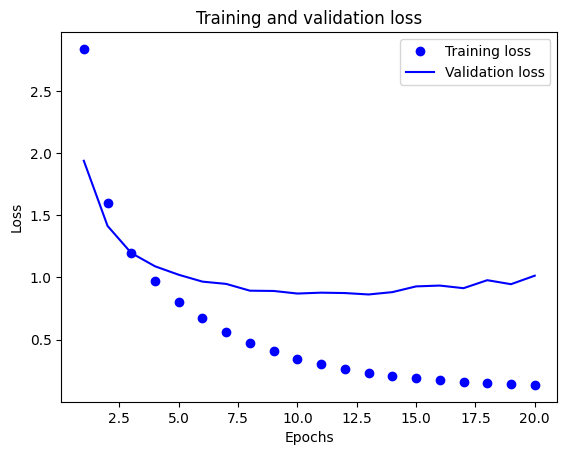

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
plt.clf()

<Figure size 640x480 with 0 Axes>

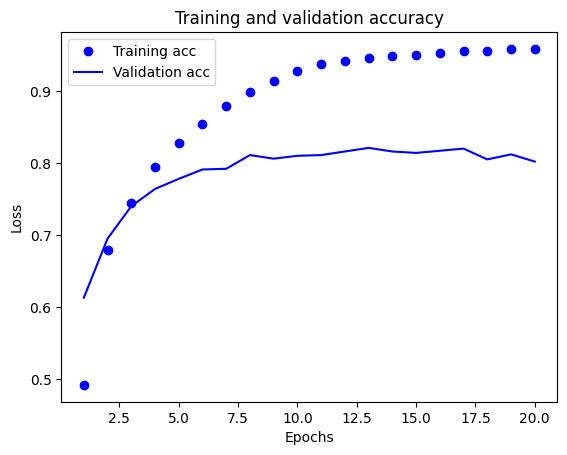

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 96ms/step - loss: 2.6719 - accuracy: 0.4723 - val_loss: 1.7819 - val_accuracy: 0.6140
Epoch 2/9
16/16 [==============================] - 2s 97ms/step - loss: 1.5266 - accuracy: 0.6763 - val_loss: 1.3717 - val_accuracy: 0.6820
Epoch 3/9
16/16 [==============================] - 1s 60ms/step - loss: 1.1804 - accuracy: 0.7481 - val_loss: 1.1860 - val_accuracy: 0.7390
Epoch 4/9
16/16 [==============================] - 1s 54ms/step - loss: 0.9659 - accuracy: 0.7965 - val_loss: 1.0908 - val_accuracy: 0.7560
Epoch 5/9
16/16 [==============================] - 1s 57ms/step - loss: 0.8045 - accuracy: 0.8262 - val_loss: 1.0179 - val_accuracy: 0.7790
Epoch 6/9
16/16 [==============================] - 1s 54ms/step - loss: 0.6676 - accuracy: 0.8562 - val_loss: 0.9627 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 53ms/step - loss: 0.5569 - accuracy: 0.8810 - val_loss: 0.9403 - val_accuracy: 0.7860
Epoch 8/9
16/16 [===

In [30]:
results


[0.9619179964065552, 0.7871772050857544]

In [31]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18210151380231523

In [32]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 6ms/step


In [33]:
 predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

1.0000001

In [35]:
np.argmax(predictions[0])

3

In [37]:
y_train = np.array(train_labels)


In [38]:
y_test = np.array(test_labels)

In [39]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 2.7741 - accuracy: 0.4099 - val_loss: 2.0642 - val_accuracy: 0.5330
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.8260 - accuracy: 0.5504 - val_loss: 1.6943 - val_accuracy: 0.5670
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.5759 - accuracy: 0.5663 - val_loss: 1.5787 - val_accuracy: 0.5720
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.4284 - accuracy: 0.6072 - val_loss: 1.4958 - val_accuracy: 0.6210
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3042 - accuracy: 0.6515 - val_loss: 1.4469 - val_accuracy: 0.6460
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2048 - accuracy: 0.6855 - val_loss: 1.4246 - val_accuracy: 0.6680
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1323 - accuracy: 0.7106 - val_loss: 1.4123 - val_accuracy: 0.6770
Epoch 8/20
63

In [44]:
results

[0.9619179964065552, 0.7871772050857544]